## Clustering Marco Gonzales's Pitches

How many pitches does he have?

Source: https://baseballsavant.mlb.com/statcast_search?hfPT=&hfAB=&hfBBT=&hfPR=&hfZ=&stadium=&hfBBL=&hfNewZones=&hfGT=R%7C&hfC=&hfSea=2018%7C2017%7C&hfSit=&player_type=pitcher&hfOuts=&opponent=&pitcher_throws=&batter_stands=&hfSA=&game_date_gt=&game_date_lt=&hfInfield=&team=&position=&hfOutfield=&hfRO=&home_road=&hfFlag=&hfPull=&pitchers_lookup%5B%5D=594835&metric_1=&hfInn=&min_pitches=0&min_results=0&group_by=name-event&sort_col=pitches&player_event_sort=api_p_release_speed&sort_order=desc&min_pas=0&chk_event_launch_speed=on&chk_event_release_speed=on#results

In [54]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D
sns.set_style('darkgrid')

In [55]:
pitches = (pd.read_csv('marco_gonzales_baseball_savant.csv', 
                      usecols=['game_date','pfx_x','pfx_z','release_speed'],
                      parse_dates=['game_date'])
                      .rename(columns={'pfx_x': 'horizontal_break',
                                       'pfx_z': 'vertical_break',
                                       'release_speed': 'velocity'}))
pitches['year'] = pitches['game_date'].dt.year

In [56]:
result_2017 = pitches.query('year==2017').dropna().drop(['game_date','year'], axis=1).reset_index(drop=True)
result_2018 = pitches.query('year==2018').dropna().drop(['game_date','year'], axis=1).reset_index(drop=True)

## 3D Plots

In [57]:
def create_3d_plot(df, x, y, z):
    fig = plt.figure()
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=20, azim=300)

    plt.cla()
    ax.scatter(df[x], df[y], df[z])

    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)

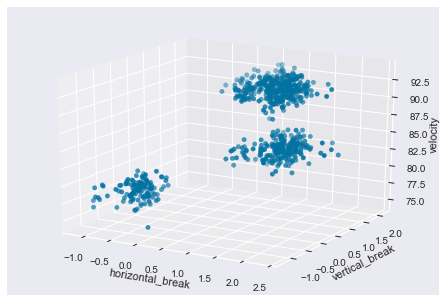

In [58]:
create_3d_plot(result_2017, 'horizontal_break','vertical_break', 'velocity')

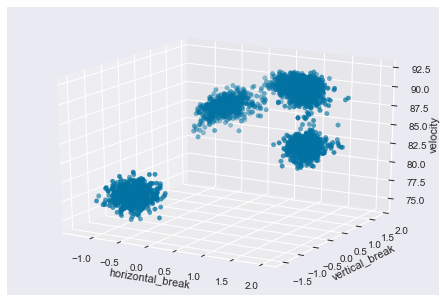

In [59]:
create_3d_plot(result_2018, 'horizontal_break','vertical_break', 'velocity')

## Use Elbow Method

In [95]:
## Source: https://www.scikit-yb.org/en/latest/about.html
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.preprocessing import MinMaxScaler

In [79]:
mms = MinMaxScaler()
result_2017_mms = mms.fit_transform(result_2017)
result_2018_mms = mms.fit_transform(result_2018)

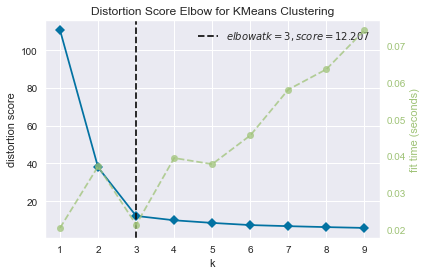

In [80]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(result_2017_mms)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

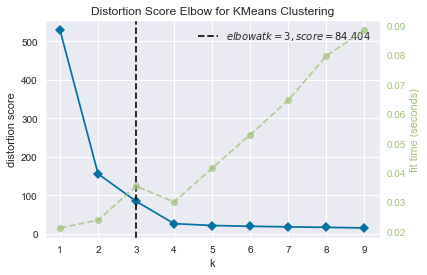

In [81]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(result_2018_mms)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## Using Silhouette Method

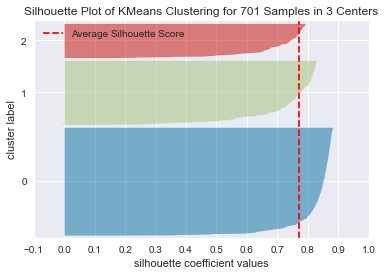

In [82]:
model = KMeans(3)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(result_2017)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

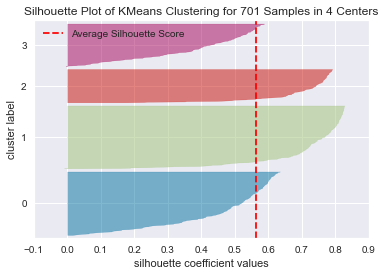

In [83]:
model = KMeans(4)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(result_2017)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

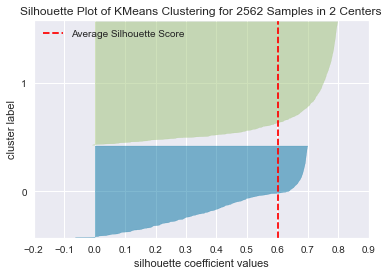

In [84]:
model = KMeans(2)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(result_2018)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

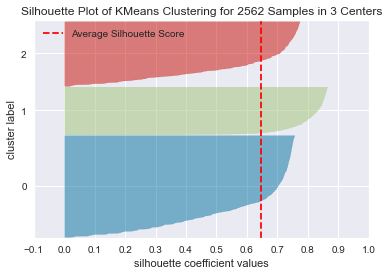

In [85]:
model = KMeans(3)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(result_2018)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

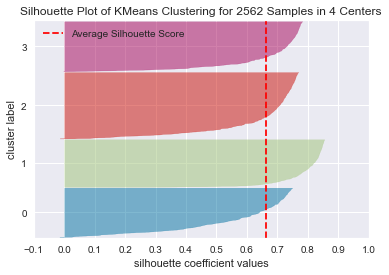

In [86]:
model = KMeans(4)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(result_2018)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

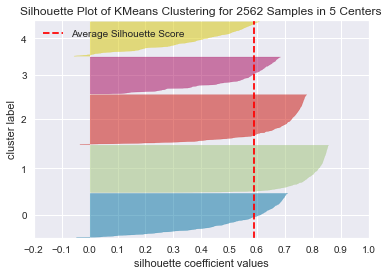

In [87]:
model = KMeans(5)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(result_2018)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

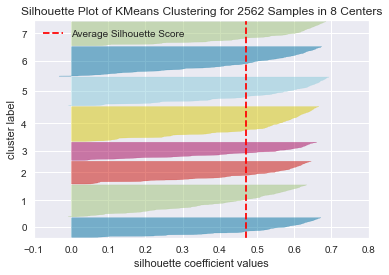

In [71]:
model = KMeans()
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(result_2018)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## Gaussian Mixture Model

Method used by MLB Pitch Classification algorithm: https://technology.mlblogs.com/mlb-pitch-classification-64a1e32ee079

Text(0.5, 1.0, 'BIC for n clusters: Marco Gonzales (2017)')

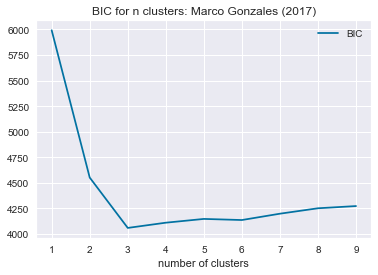

In [93]:
n_components = np.arange(1, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0, verbose=0, verbose_interval=100).fit(result_2017)
          for n in n_components]

bic_scores = [m.bic(result_2017) for m in models]
fig, ax = plt.subplots()
ax.plot(n_components, bic_scores, label='BIC')
plt.legend(loc='best')
plt.xlabel('number of clusters')
ax.set_title('BIC for n clusters: Marco Gonzales (2017)')

Text(0.5, 1.0, 'BIC for n clusters: Marco Gonzales (2018)')

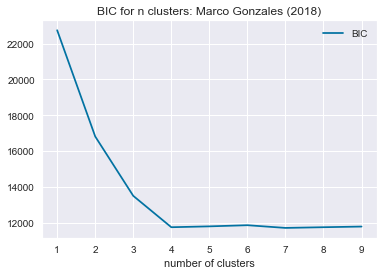

In [94]:
n_components = np.arange(1, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0, verbose=0, verbose_interval=100).fit(result_2018)
          for n in n_components]

bic_scores = [m.bic(result_2018) for m in models]
fig, ax = plt.subplots()
ax.plot(n_components, bic_scores, label='BIC')
plt.legend(loc='best')
plt.xlabel('number of clusters')
ax.set_title('BIC for n clusters: Marco Gonzales (2018)')